In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the data
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
# printing target names
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
# printing input features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# EDA
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# printing the top 5 records
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [7]:
# printing first 5 target labels
print(iris.target[0:5])

[0 0 0 0 0]


In [8]:
# Converting the dataset into a dataframe
data = pd.DataFrame({
    'sepal length' : iris.data[:,0],
    'sepal width' : iris.data[:,1],
    'petal length' : iris.data[:,2],
    'petal width' : iris.data[:,3],
    'species' : iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# Separating input and output features
X = data[['sepal length','sepal width','petal length','petal width']]
y = data['species']

In [10]:
# Train Test Split on data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [11]:
# Creating Extra Trees Model
etf = ExtraTreesClassifier(n_estimators = 100, criterion = 'entropy', max_features = 4)

# Fitting the Model
etf.fit(X_train, y_train)

# Predicting from the model
y_pred = etf.predict(X_test)

In [12]:
# Evaluating the accuracy of algorithm
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

Accuracy : 1.0


In [14]:
# Predicting on a single data point
etf.predict([[3,5,4,2]])

array([2])

In [ ]:
# Here, 2 indicates the flower type Virginica.

In [15]:
# Normalizing Feature Importance
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                       etf.estimators_],
                                      axis = 0)
feature_importance_normalized

array([0.07514986, 0.02974647, 0.28204124, 0.27433985])

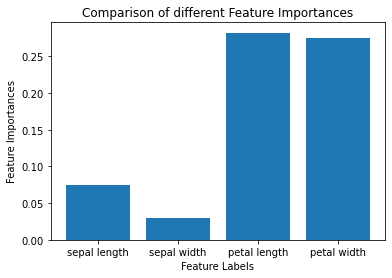

In [16]:
# Plotting Normalized Feature Importances
plt.bar(X_train.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()